In [1]:
# read in text files
import pandas as pd

ca = pd.read_csv('../DataScienceinPythonDataPrepEDA-230717-120846/Data/happiness_data_ca.txt')
mx = pd.read_csv('../DataScienceinPythonDataPrepEDA-230717-120846/Data/happiness_data_mx.txt')
us = pd.read_csv('../DataScienceinPythonDataPrepEDA-230717-120846/Data/happiness_data_us.txt')
cr = pd.read_csv('../DataScienceinPythonDataPrepEDA-230717-120846/Data/happiness_data_cr.txt')

In [2]:
# canada data
ca.head(2)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Canada,2005,7.418048,0.961552,0.957306,70.500000
1,Canada,2007,7.481753,NaN,0.930341,70.620003


In [3]:
# mexico data
mx.head(2)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Mexico,2005,6.580658,0.902808,0.813745,64.400002
1,Mexico,2007,6.525378,0.878806,0.670430,64.680000


In [4]:
# us data - missing last column
us.head(2)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices
0,United States,2006,7.181794,0.964572,0.911496
1,United States,2007,7.512688,NaN,0.871904


In [5]:
# costa rica data - first column has different name
cr.head(2)

,nombre del país,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Costa Rica,2006,7.082465,0.936938,0.882420,68.559998
1,Costa Rica,2007,7.432132,0.917678,0.922736,68.720001


## Append

In [6]:
# pd.concat([df1, df2, df3, …] )

In [7]:
#append all countries and rename cr country_name then reset & drop index column 
pd.concat([ca, mx, us, cr.rename(columns = {'nombre del país': 'country_name'})]).reset_index(drop=True)

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Canada,2005,7.418048,0.961552,0.957306,70.500000
1,Canada,2007,7.481753,NaN,0.930341,70.620003
2,Canada,2008,7.485604,0.938707,0.926315,70.680000
3,Canada,2009,7.487824,0.942845,0.915058,70.739998
4,Canada,2010,7.650346,0.953765,0.933949,70.800003
...,...,...,...,...,...,...
59,Costa Rica,2017,7.225182,0.921697,0.935618,70.000000
60,Costa Rica,2018,7.141075,0.875872,0.941888,70.000000
61,Costa Rica,2019,6.997619,0.906077,0.926830,70.000000
62,Costa Rica,2020,6.338472,0.834200,0.889400,70.000000


## Merge

In [8]:
#.merge()
# left_df.merge(right_df,
#              how,             - type of join
#              left_on,         - column(s) on left
#              right_on)        - column(s) on right

In [9]:
# read in spreadsheet
sales_may = pd.read_excel('../DataScienceinPythonDataPrepEDA-230717-120846/Data/Sales Tables.xlsx', sheet_name=0)
sales_june = pd.read_excel('../DataScienceinPythonDataPrepEDA-230717-120846/Data/Sales Tables.xlsx', sheet_name=1)
regions = pd.read_excel('../DataScienceinPythonDataPrepEDA-230717-120846/Data/Sales Tables.xlsx', sheet_name=2)

In [10]:
sales_may

,date,store,sales
0,2022-05-01,1,341
1,2022-05-01,2,291
2,2022-05-01,3,493
3,2022-05-01,4,428
4,2022-05-01,5,152


In [11]:
regions

,store,region
0,2,North
1,3,East
2,4,West
3,8,South


In [12]:
sales_may.merge(regions)

,date,store,sales,region
0,2022-05-01,2,291,North
1,2022-05-01,3,493,East
2,2022-05-01,4,428,West


In [13]:
#add how argument to preserve the rows in sales ; join on left
sales_may.merge(regions, how='left')

,date,store,sales,region
0,2022-05-01,1,341,NaN
1,2022-05-01,2,291,North
2,2022-05-01,3,493,East
3,2022-05-01,4,428,West
4,2022-05-01,5,152,NaN


In [14]:
#join types

In [15]:
#filter to only 2020's data
happy_scores = pd.concat([ca, mx, us, cr.rename(columns = {'nombre del país': 'country_name'})]).reset_index(drop=True)
happy_scores = happy_scores[happy_scores.year > 2019]
happy_scores

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
14,Canada,2020,7.024905,0.930611,0.886892,71.349998
15,Canada,2021,6.939435,0.926076,0.898229,71.400002
30,Mexico,2020,5.964221,0.778816,0.873347,65.800003
31,Mexico,2021,5.990751,0.778605,0.837159,65.800003
46,United States,2020,7.028088,0.937370,0.850447,NaN
47,United States,2021,6.959088,0.920009,0.815735,NaN
62,Costa Rica,2020,6.338472,0.834200,0.889400,70.000000
63,Costa Rica,2021,6.408448,0.876052,0.886652,70.000000


In [16]:
# population by country in North America
pop = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)')[0] #read 1st table on page
pop = pop[pop['UN statistical subregion[1]'] == 'Northern America']  #filter to Northern America
pop

,Country or territory,Population (1 July 2022),Population (1 July 2023),Change (%),UN continental region[1],UN statistical subregion[1]
3,United States,341534046,343477335,+0.57%,Americas,Northern America
38,Canada,38821259,39299105,+1.23%,Americas,Northern America
207,Bermuda (United Kingdom),64749,64698,−0.08%,Americas,Northern America
209,Greenland (Denmark),54990,55922,+1.69%,Americas,Northern America
231,Saint Pierre and Miquelon (France),5732,5681,−0.89%,Americas,Northern America


In [17]:
#merge happy scores with new pop table
happy_scores.merge(pop, how='inner', left_on = 'country_name', right_on = 'Country or territory')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country or territory,Population (1 July 2022),Population (1 July 2023),Change (%),UN continental region[1],UN statistical subregion[1]
0,Canada,2020,7.024905,0.930611,0.886892,71.349998,Canada,38821259,39299105,+1.23%,Americas,Northern America
1,Canada,2021,6.939435,0.926076,0.898229,71.400002,Canada,38821259,39299105,+1.23%,Americas,Northern America
2,United States,2020,7.028088,0.937370,0.850447,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America
3,United States,2021,6.959088,0.920009,0.815735,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America


In [18]:
happy_scores.merge(pop, how='outer', left_on = 'country_name', right_on = 'Country or territory')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country or territory,Population (1 July 2022),Population (1 July 2023),Change (%),UN continental region[1],UN statistical subregion[1]
0,Canada,2020.0,7.024905,0.930611,0.886892,71.349998,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
1,Canada,2021.0,6.939435,0.926076,0.898229,71.400002,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
2,Mexico,2020.0,5.964221,0.778816,0.873347,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
3,Mexico,2021.0,5.990751,0.778605,0.837159,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020.0,7.028088,0.937370,0.850447,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
5,United States,2021.0,6.959088,0.920009,0.815735,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
6,Costa Rica,2020.0,6.338472,0.834200,0.889400,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,Costa Rica,2021.0,6.408448,0.876052,0.886652,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,Bermuda (United Kingdom),64749.0,64698.0,−0.08%,Americas,Northern America
9,NaN,NaN,NaN,NaN,NaN,NaN,Greenland (Denmark),54990.0,55922.0,+1.69%,Americas,Northern America


In [19]:
happy_scores.merge(pop, how='left', left_on = 'country_name', right_on = 'Country or territory')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country or territory,Population (1 July 2022),Population (1 July 2023),Change (%),UN continental region[1],UN statistical subregion[1]
0,Canada,2020,7.024905,0.930611,0.886892,71.349998,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
1,Canada,2021,6.939435,0.926076,0.898229,71.400002,Canada,38821259.0,39299105.0,+1.23%,Americas,Northern America
2,Mexico,2020,5.964221,0.778816,0.873347,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
3,Mexico,2021,5.990751,0.778605,0.837159,65.800003,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020,7.028088,0.937370,0.850447,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
5,United States,2021,6.959088,0.920009,0.815735,NaN,United States,341534046.0,343477335.0,+0.57%,Americas,Northern America
6,Costa Rica,2020,6.338472,0.834200,0.889400,70.000000,NaN,NaN,NaN,NaN,NaN,NaN
7,Costa Rica,2021,6.408448,0.876052,0.886652,70.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
happy_scores.merge(pop, how='right', left_on = 'country_name', right_on = 'Country or territory')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth,Country or territory,Population (1 July 2022),Population (1 July 2023),Change (%),UN continental region[1],UN statistical subregion[1]
0,United States,2020.0,7.028088,0.937370,0.850447,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America
1,United States,2021.0,6.959088,0.920009,0.815735,NaN,United States,341534046,343477335,+0.57%,Americas,Northern America
2,Canada,2020.0,7.024905,0.930611,0.886892,71.349998,Canada,38821259,39299105,+1.23%,Americas,Northern America
3,Canada,2021.0,6.939435,0.926076,0.898229,71.400002,Canada,38821259,39299105,+1.23%,Americas,Northern America
4,NaN,NaN,NaN,NaN,NaN,NaN,Bermuda (United Kingdom),64749,64698,−0.08%,Americas,Northern America
5,NaN,NaN,NaN,NaN,NaN,NaN,Greenland (Denmark),54990,55922,+1.69%,Americas,Northern America
6,NaN,NaN,NaN,NaN,NaN,NaN,Saint Pierre and Miquelon (France),5732,5681,−0.89%,Americas,Northern America


In [21]:
#create single table

In [22]:
# connect to a sql database
import pandas as pd
import sqlite3

conn = sqlite3.connect('../DataScienceinPythonDataPrepEDA-230717-120846/Data/online_shop.db')

In [23]:
#view transaction table
transactions = pd.read_sql('SELECT * FROM transactions', conn)
transactions.head()

,customer,item_id,purchase_date
0,Ava,1011,4/1/23
1,Ava,1014,4/1/23
2,Ava,1015,4/15/23
3,Ava,1018,5/1/23
4,Ben,2345,4/15/23


In [24]:
# view the items table
items = pd.read_sql('SELECT * FROM items', conn)
items.head()

,item_id,item_description,price,category,rating
0,1011,Paint,$15.99,Arts & Crafts,3.5
1,1012,Crayons,$2.87,Arts & Crafts,4.7
2,1013,Markers,$2.50,Arts & Crafts,4.8
3,1014,Brush,$1.99,Arts & Crafts,4.2
4,1015,Paper,$22.49,Arts & Crafts,4.5


In [25]:
#merge the two using left join
df = transactions.merge(items, how='left', on='item_id')
df

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,4/1/23,Paint,$15.99,Arts & Crafts,3.5
1,Ava,1014,4/1/23,Brush,$1.99,Arts & Crafts,4.2
2,Ava,1015,4/15/23,Paper,$22.49,Arts & Crafts,4.5
3,Ava,1018,5/1/23,Scissors,$3.50,Arts & Crafts,4.6
4,Ben,2345,4/15/23,Dog Food,$29.99,Pet Supplies,4.9
...,...,...,...,...,...,...,...
105,Jenny,1011,4/20/23,Paint,$15.99,Arts & Crafts,3.5
106,Jenny,1014,4/20/23,Brush,$1.99,Arts & Crafts,4.2
107,Jenny,1018,4/20/23,Scissors,$3.50,Arts & Crafts,4.6
108,Jenny,1012,4/20/23,Crayons,$2.87,Arts & Crafts,4.7


## Prepare Rows for Modeling

 goal: predict which customers are most likely to buy dog food in june
- each row should contain data for one customer
- y: june dog food purchases
- x: aggregation based on april and may data

In [26]:
df

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,4/1/23,Paint,$15.99,Arts & Crafts,3.5
1,Ava,1014,4/1/23,Brush,$1.99,Arts & Crafts,4.2
2,Ava,1015,4/15/23,Paper,$22.49,Arts & Crafts,4.5
3,Ava,1018,5/1/23,Scissors,$3.50,Arts & Crafts,4.6
4,Ben,2345,4/15/23,Dog Food,$29.99,Pet Supplies,4.9
...,...,...,...,...,...,...,...
105,Jenny,1011,4/20/23,Paint,$15.99,Arts & Crafts,3.5
106,Jenny,1014,4/20/23,Brush,$1.99,Arts & Crafts,4.2
107,Jenny,1018,4/20/23,Scissors,$3.50,Arts & Crafts,4.6
108,Jenny,1012,4/20/23,Crayons,$2.87,Arts & Crafts,4.7


In [27]:
#data types
df.dtypes

customer            object
item_id              int64
purchase_date       object
item_description    object
price               object
category            object
rating              object
dtype: object

In [28]:
#convert data types to datetime and numeric fields
df.purchase_date = pd.to_datetime(df.purchase_date)
df.price = pd.to_numeric(df.price.str.replace('$', ''))
df.rating = pd.to_numeric(df.rating)
df.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22832\4267045640.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.purchase_date = pd.to_datetime(df.purchase_date)


customer                    object
item_id                      int64
purchase_date       datetime64[ns]
item_description            object
price                      float64
category                    object
rating                     float64
dtype: object

In [29]:
#create subset of april and may data ; x
df_april_may = df[df.purchase_date.dt.month < 6]
df_april_may.head()

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,2023-04-01,Paint,15.99,Arts & Crafts,3.5
1,Ava,1014,2023-04-01,Brush,1.99,Arts & Crafts,4.2
2,Ava,1015,2023-04-15,Paper,22.49,Arts & Crafts,4.5
3,Ava,1018,2023-05-01,Scissors,3.50,Arts & Crafts,4.6
4,Ben,2345,2023-04-15,Dog Food,29.99,Pet Supplies,4.9


In [30]:
#create subset of june data ; y
df_june = df[df.purchase_date.dt.month == 6]
df_june.head()

,customer,item_id,purchase_date,item_description,price,category,rating
6,Ben,2345,2023-06-15,Dog Food,29.99,Pet Supplies,4.9
12,Chloe,2345,2023-06-06,Dog Food,29.99,Pet Supplies,4.9
24,Blake,2545,2023-06-10,Cat Food,25.55,Pet Supplies,4.2
34,Maxwell,5674,2023-06-02,Video Game,30.99,Games & Toys,4.1
36,Isabel,3811,2023-06-15,Socks,7.50,Apparel,3.7


In [31]:
# y - from subset of june data created, find the dog food purchases
#create column of june dog food purchases 
dog_food_rows = df_june[df_june.item_description == 'Dog Food']  #filter df_june on the dog food

#collapse the data above - count each item_id by customer rows
june_dog_food_purchases = (dog_food_rows
                           .groupby('customer')['item_id']
                           .count()
                           .rename('june_dog_food_purchases'))

# assign new series - this is the y axis produced
june_dog_food_purchases

customer
Aiden     1
Ben       1
Calvin    1
Chloe     1
Lia       1
Lily      1
Olivia    1
Name: june_dog_food_purchases, dtype: int64

In [32]:
# x - from subset of april and may data,how much did each customer spend?
# find sum of price by each customer
total_spend = df_april_may.groupby('customer')['price'].sum().rename('total_spend')
total_spend  # assign new series - this is the x axis

customer
Aiden       222.16
Ava          43.97
Ben          44.19
Bennett      27.73
Blake        25.55
Calvin       29.99
Chloe        36.33
Daniel       17.46
Evelyn       66.19
Gavin        39.47
Henry       112.42
Isabel        2.79
Jenny        49.34
Kate         83.25
Lia          78.95
Lily         69.31
Madeline    122.63
Margaret      7.99
Maxwell      78.31
Nolan        67.51
Olivia       68.03
Sophie        2.57
Name: total_spend, dtype: float64

In [33]:
#merge horizontally the series axis=1 > fillna(0) 
# > notice customer is index values ; reset_index > rename the index > assign in new df
model_df = (pd.concat([june_dog_food_purchases, total_spend], axis=1)
             .fillna(0).reset_index()
             .rename(columns={'index':'customer'}))
model_df

,customer,june_dog_food_purchases,total_spend
0,Aiden,1.0,222.16
1,Ben,1.0,44.19
2,Calvin,1.0,29.99
3,Chloe,1.0,36.33
4,Lia,1.0,78.95
5,Lily,1.0,69.31
6,Olivia,1.0,68.03
7,Ava,0.0,43.97
8,Bennett,0.0,27.73
9,Blake,0.0,25.55


## Prepare Columns for Modeling

**dummy variables - for text to numeric field**

goal: change the category column into numeric values

In [34]:
# .get_dummies()

In [35]:
model_df.head(2)

,customer,june_dog_food_purchases,total_spend
0,Aiden,1.0,222.16
1,Ben,1.0,44.19


In [36]:
df_april_may.head(2)

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,2023-04-01,Paint,15.99,Arts & Crafts,3.5
1,Ava,1014,2023-04-01,Brush,1.99,Arts & Crafts,4.2


In [37]:
#create dummy variables by specifying the column to get dummies 
#categorical from df_april_may to be added to model_df later
category_dummies = pd.get_dummies(df_april_may.category)
category_dummies

,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
105,False,True,False,False,False
106,False,True,False,False,False
107,False,True,False,False,False
108,False,True,False,False,False


In [38]:
#merge dummies with df_april_may.customer - matched on index
pd.concat([df_april_may.customer, category_dummies], axis=1)

,customer,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,Ava,False,True,False,False,False
1,Ava,False,True,False,False,False
2,Ava,False,True,False,False,False
3,Ava,False,True,False,False,False
4,Ben,False,False,False,False,True
...,...,...,...,...,...,...
105,Jenny,False,True,False,False,False
106,Jenny,False,True,False,False,False
107,Jenny,False,True,False,False,False
108,Jenny,False,True,False,False,False


In [39]:
#from merged table, group by customer to collapse & have single rows of customer
#assign to new series
categories = (pd.concat([df_april_may.customer, category_dummies], axis=1)
              .groupby('customer').sum().reset_index())
categories.head()

,customer,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,Aiden,0,0,0,0,8
1,Ava,0,4,0,0,0
2,Ben,0,0,0,0,2
3,Bennett,0,5,0,0,0
4,Blake,0,0,0,0,1


In [40]:
#add the new categories table to model_df
model_df = model_df.merge(categories, how='left', on='customer')

model_df.head() #run once

,customer,june_dog_food_purchases,total_spend,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies
0,Aiden,1.0,222.16,0,0,0,0,8
1,Ben,1.0,44.19,0,0,0,0,2
2,Calvin,1.0,29.99,0,0,0,0,1
3,Chloe,1.0,36.33,3,2,0,0,0
4,Lia,1.0,78.95,2,0,0,0,1


## Prepare DateTime Columns

In [41]:
model_df.shape

(22, 8)

In [42]:
#view the dataframe with april/may behavior
df_april_may.head()

,customer,item_id,purchase_date,item_description,price,category,rating
0,Ava,1011,2023-04-01,Paint,15.99,Arts & Crafts,3.5
1,Ava,1014,2023-04-01,Brush,1.99,Arts & Crafts,4.2
2,Ava,1015,2023-04-15,Paper,22.49,Arts & Crafts,4.5
3,Ava,1018,2023-05-01,Scissors,3.50,Arts & Crafts,4.6
4,Ben,2345,2023-04-15,Dog Food,29.99,Pet Supplies,4.9


In [43]:
df_april_may.shape

(93, 7)

**goal: add on a new column based on date (number of days since last purchase)**

In [44]:
#find the last purchase date
last_purchase = df_april_may.groupby('customer')['purchase_date'].max()
last_purchase.head()

customer
Aiden     2023-05-19
Ava       2023-05-01
Ben       2023-04-20
Bennett   2023-04-25
Blake     2023-05-10
Name: purchase_date, dtype: datetime64[ns]

In [45]:
#create 'Today' series - to note down today's date
today = pd.Series(pd.to_datetime('2023-06-01'), index=last_purchase.index)  #pd.Series - array that holds any dtypes
today.head()

customer
Aiden     2023-06-01
Ava       2023-06-01
Ben       2023-06-01
Bennett   2023-06-01
Blake     2023-06-01
dtype: datetime64[ns]

In [46]:
#create a calculated series - to find number of days since last purchase
#extract dt.days from calculation
days_between = (today - last_purchase).dt.days.rename('days_between')
days_between.head()

customer
Aiden      13
Ava        31
Ben        42
Bennett    37
Blake      22
Name: days_between, dtype: int64

In [47]:
#add the days_between series into model_df
#days_between doesnt have a matching index with model_df ; reset_index the days_between
model_df = model_df.merge(days_between.reset_index(), how='left', on='customer') 
model_df.head()

,customer,june_dog_food_purchases,total_spend,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies,days_between
0,Aiden,1.0,222.16,0,0,0,0,8,13
1,Ben,1.0,44.19,0,0,0,0,2,42
2,Calvin,1.0,29.99,0,0,0,0,1,16
3,Chloe,1.0,36.33,3,2,0,0,0,28
4,Lia,1.0,78.95,2,0,0,0,1,12


## Feature Engineering

- log transforms
- scaling: normalization / standardization
- proxy variables

In [48]:
# house prices data
houses = pd.read_csv('../DataScienceinPythonDataPrepEDA-230717-120846/Data/house_listings.csv')
houses.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,1335 S Prairie Ave #1105,Chicago,IL,60605,799000,3.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/1335-S-Prairi...,MRED,11268174,N,Y,41.864674,-87.620765
1,MLS Listing,NaN,Single Family Residential,4944 W Roscoe St,Chicago,IL,60641,424900,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/4944-W-Roscoe...,MRED,11268165,N,Y,41.942626,-87.751249
2,MLS Listing,NaN,Single Family Residential,8111 S Scottsdale Ave,Chicago,IL,60652,265000,3.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/8111-S-Scotts...,MRED,11268170,N,Y,41.745964,-87.737172
3,MLS Listing,NaN,Condo/Co-op,4335 N Mozart St #1,Chicago,IL,60618,325000,3.0,2.0,...,Active,November-14-2021 11:00 AM,November-14-2021 12:30 PM,http://www.redfin.com/IL/Chicago/4335-N-Mozart...,MRED,11266874,N,Y,41.960457,-87.699344
4,MLS Listing,NaN,Single Family Residential,5736 S Loomis Blvd,Chicago,IL,60636,159900,5.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/5736-S-Loomis...,MRED,11268151,N,Y,41.789370,-87.659866


In [49]:
#log transform

In [50]:
# look at price data
houses.PRICE

0      799000
1      424900
2      265000
3      325000
4      159900
        ...  
338    649000
339    265000
340     72000
341    245000
342    190000
Name: PRICE, Length: 343, dtype: int64

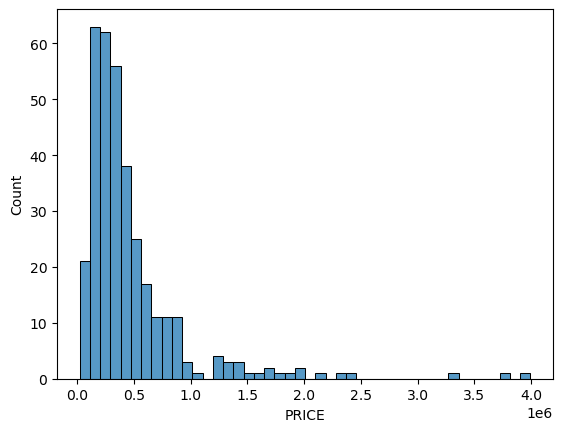

In [51]:
# plot price data
import seaborn as sns

sns.histplot(houses.PRICE);

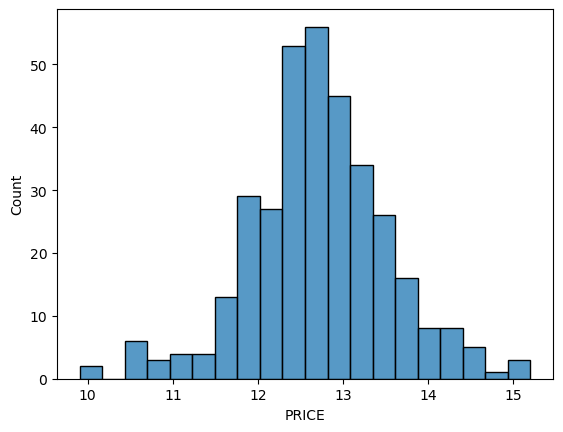

In [52]:
# take the log of price data
import numpy as np

sns.histplot(np.log(houses.PRICE));

In [53]:
#normalization and standardization

In [54]:
beds = houses.BEDS[:5]
beds

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: BEDS, dtype: float64

In [55]:
# normalization formula
(beds - beds.min()) / (beds.max() - beds.min())

0    0.0
1    0.5
2    0.0
3    0.0
4    1.0
Name: BEDS, dtype: float64

In [56]:
beds.min()

3.0

In [57]:
(beds - beds.min()) / (beds.max() - beds.min())

0    0.0
1    0.5
2    0.0
3    0.0
4    1.0
Name: BEDS, dtype: float64

In [58]:
beds

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: BEDS, dtype: float64

In [59]:
# standardization formula
(beds - beds.mean()) / beds.std()

0   -0.670820
1    0.447214
2   -0.670820
3   -0.670820
4    1.565248
Name: BEDS, dtype: float64

In [60]:
beds.mean()

3.6

In [61]:
beds.std()

0.8944271909999159

In [62]:
#feature engineering

In [63]:
# we've been doing feature engineering all along -- this is ready to be input into a model!
model_df

,customer,june_dog_food_purchases,total_spend,Apparel,Arts & Crafts,Games & Toys,Personal Care,Pet Supplies,days_between
0,Aiden,1.0,222.16,0,0,0,0,8,13
1,Ben,1.0,44.19,0,0,0,0,2,42
2,Calvin,1.0,29.99,0,0,0,0,1,16
3,Chloe,1.0,36.33,3,2,0,0,0,28
4,Lia,1.0,78.95,2,0,0,0,1,12
5,Lily,1.0,69.31,0,0,2,0,4,7
6,Olivia,1.0,68.03,1,1,0,0,2,12
7,Ava,0.0,43.97,0,4,0,0,0,31
8,Bennett,0.0,27.73,0,5,0,0,0,37
9,Blake,0.0,25.55,0,0,0,0,1,22
